In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

In [11]:
x = tf.Variable(3.0)
y = tf.Variable(5.0)
with tf.GradientTape() as tape:
  m = x**2 + y**2
  z = m**2
# Excepted  dz/dx = 2*m*2*x = 2*34*2*3=408; m = 3**2 + 5**2 = 34
gradients = tape.gradient(z, {'x' : x, 'y': y})
print(gradients)

{'x': <tf.Tensor: shape=(), dtype=float32, numpy=408.0>, 'y': <tf.Tensor: shape=(), dtype=float32, numpy=680.0>}


# Gradient w.r.t variable will have same shape as variable

In [4]:
x = tf.Variable([[3.0],[5.0],[8.0]])
y = tf.Variable([[2.0,4.0,1.0]])
with tf.GradientTape() as tape:
  z = tf.reduce_sum(tf.matmul(x,y))
print(z.numpy)
print(tape.gradient(z,x))

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=112.0>>
tf.Tensor(
[[7.]
 [7.]
 [7.]], shape=(3, 1), dtype=float32)


In [12]:
x = tf.Variable([[3.0],[5.0],[8.1]])
y = tf.Variable([[2.0,4.0,1.0]])
with tf.GradientTape() as tape:
  z = tf.reduce_sum(tf.matmul(x,y))
print(z.numpy)
print(tape.gradient(z,x))

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=112.70000457763672>>
tf.Tensor(
[[7.]
 [7.]
 [7.]], shape=(3, 1), dtype=float32)


# Tape by default only watches trainable variables

In [13]:
cons = tf.constant(3.0)
train_var = tf.Variable(5.0)
non_train_var  = tf.Variable(6.0, trainable=False)
with tf.GradientTape() as tape:
  z = cons * train_var + train_var * non_train_var
print(tape.gradient(z,[cons,train_var,non_train_var]))

[None, <tf.Tensor: shape=(), dtype=float32, numpy=9.0>, None]


# Use tape.watch( ) to compute gradient w.r.t tf.tensors like constant tensor

In [14]:
cons = tf.constant(3.0)
train_var = tf.Variable(5.0)
non_train_var  = tf.Variable(6.0, trainable=False)
with tf.GradientTape() as tape:
  tape.watch(cons)
  tape.watch(non_train_var)
  z = cons * train_var + train_var * non_train_var
print(tape.gradient(z,[cons,train_var,non_train_var]))

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>, <tf.Tensor: shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]


# persistent Tape

In [15]:
x = tf.Variable(3.0)
y = tf.Variable(5.0)
with tf.GradientTape() as tape:
  m = x**2 + y**2
  z = m**2
# Excepted  dz/dx = 2*m*2*x = 2*34*2*3=408; m = 3**2 + 5**2 = 34
print(tape.gradient(z,x))
try:
  print(tape.gradient(z,y))
except Exception as e:
  print(e)

tf.Tensor(408.0, shape=(), dtype=float32)
A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [16]:
x = tf.Variable(3.0)
y = tf.Variable(5.0)
with tf.GradientTape(persistent=True) as tape:
  m = x**2 + y**2
  z = m**2
# Excepted  dz/dx = 2*m*2*x = 2*34*2*3=408; m = 3**2 + 5**2 = 34
print(tape.gradient(z,x))
try:
  print(tape.gradient(z,y))
except Exception as e:
  print(e)
del tape

tf.Tensor(408.0, shape=(), dtype=float32)
tf.Tensor(680.0, shape=(), dtype=float32)


# Non-Scalar output/target

In [17]:
# Scenario 1: Multiple Target
# Gradient will be sum of gradient of each target with respect to variable
x = tf.Variable(3.0)
y = tf.Variable(5.0)
with tf.GradientTape(persistent = True) as tape:
  m = x**2 + y**2
  z = m**2
print(tape.gradient([m,z],x))
print(tape.gradient(m,x))
print(tape.gradient(z,x))
del tape

tf.Tensor(414.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(408.0, shape=(), dtype=float32)


In [18]:
# Scenario 2: output itself is non-scalar
# Gradient of sum will be calculated
x = tf.Variable(3.0)
c = tf.constant([1.0,4.0,6.0])
with tf.GradientTape(persistent = True) as tape:
  z = tf.square(x)*c
print(z)
print(tape.gradient(z,x))
del tape

tf.Tensor([ 9. 36. 54.], shape=(3,), dtype=float32)
tf.Tensor(66.0, shape=(), dtype=float32)


tf.Tensor(
[2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4
 5.6 5.8], shape=(20,), dtype=float64)
tf.Tensor(
[1.   1.21 1.44 1.69 1.96 2.25 2.56 2.89 3.24 3.61 4.   4.41 4.84 5.29
 5.76 6.25 6.76 7.29 7.84 8.41], shape=(20,), dtype=float64)


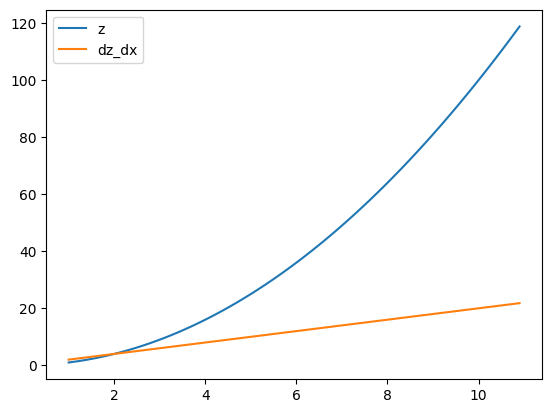

In [19]:
# scenario 3 source and target both are not scalar
x = tf.Variable(np.arange(1,100,0.1))
with tf.GradientTape() as tape:
  z = tf.square(x)
dz_dx = tape.gradient(z,x)
print(dz_dx[0:20])
print(z[0:20])
plt.plot(x.numpy()[0:100],z.numpy()[0:100], label = "z")
plt.plot(x.numpy()[0:100],dz_dx.numpy()[0:100], label = "dz_dx")
plt.legend()
plt.show()

# Control flow within GradientTape context

In [20]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
  if x > 0:
    z = x**2
  else:
    z = x
print(tape.gradient(z,x))


tf.Tensor(6.0, shape=(), dtype=float32)


In [21]:
x = tf.Variable(4.0)
inc = tf.Variable(0.0)
with tf.GradientTape() as tape:
  while inc < 3:
    z += x**2
    inc.assign_add(1.0)
# The while loop adds x**2 to z three times, effectively making z = 3 * x**2.
# Therefore, dz/dx = d(3 * x**2)/dx = 6 * x, which evaluates to 6 * 4 = 24.
print(tape.gradient(z,x))

tf.Tensor(24.0, shape=(), dtype=float32)


# Nested Gradients

In [22]:
# There can be a scenario where we need to calculate second order differentiation like d/dx(dz/dx)
# In such scenario we can take help of nested gradient tapes
x = tf.Variable(3.0)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    z = tf.square(x)
  # the first gradient should be either inside outer_tape or inside inner_tape
  # it should not be outside outer_tape even with persistent = True
    dz_dx = inner_tape.gradient(z,x)
  # second gradient cannot have more indentation that first gradient
  #d2z_dx2 = outer_tape.gradient(dz_dx,x)  indenting at this level also works
d2z_dx2 = outer_tape.gradient(dz_dx,x)
print(dz_dx)
print(d2z_dx2)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


#Multi GradientTape object

In [ ]:
# We can create multi GradientTape object and leverage it like below
x = tf.Variable(3.0)
y = tf.Variable(4.0)
with tf.GradientTape() as tape, tf.GradientTape() as tape1:
  z = x**3 + y**2
  dz_dx = tape.gradient(z,x)
d2z_dx2 = tape1.gradient(dz_dx,x)
print(d2z_dx2)


tf.Tensor(18.0, shape=(), dtype=float32)


# Need to be Watchful while computing

In [23]:
# During forward computation, we may inadvertently replace a tf.Variable with a tf.Tensor.
# Since tf.Tensor is immutable and not tracked by GradientTape by default, gradients will be None.
x = tf.Variable(3.0)
print(x)
with tf.GradientTape() as tape:
  for i in range(3):
    z += x**2
    '''
    Updating x like this (x = x + 1) results in a new tf.Tensor being created,
    rather than modifying the existing tf.Variable.
    Since tf.Tensors are not tracked by GradientTape by default, this disconnects z from x,
    and gradients cannot be computed. To update x while preserving gradient tracking, use x.assign_add(1.0) instead.
    '''
    x = x + 1
print(tape.gradient(z,x))
test = tf.Variable(3.0)
print(test)
test = test + 1
print(test)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
None
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(4.0, shape=(), dtype=float32)


In [24]:
# If we add any computation in our forward pass which is not tensorflow related computation like using numpy,
# Then such computations are also not tracked and gradient will not be computed
x = tf.Variable([3.0, 4.0])
with tf.GradientTape() as tape:
  # Below step uses numpy which is not withing tensorflow hence this step will not be tracked
  z = np.square(x)
  output = tf.reduce_sum(z)
print(tape.gradient(output,x))

None


In [25]:
# We cannot take gradient if our variable is int
x = tf.Variable(10)
with tf.GradientTape() as tape:
  z = tf.square(x)
print(tape.gradient(z,x))

None


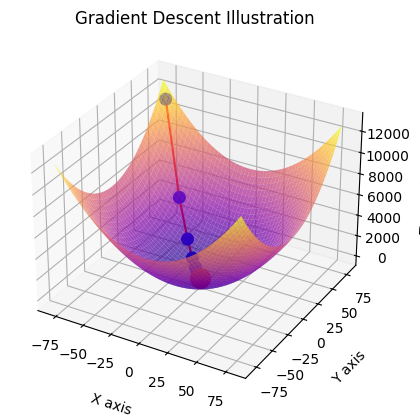

            x          y       dz_dx   lr*dz_dx       dz_dy   lr*dz_dy
0  -75.000000  75.000000 -150.000000 -30.000000  150.000000  30.000000
1  -45.000000  45.000000  -90.000000 -18.000000   90.000000  18.000000
2  -27.000000  27.000000  -54.000000 -10.800000   54.000000  10.800000
3  -16.200001  16.200001  -32.400002  -6.480000   32.400002   6.480000
4   -9.720000   9.720000  -19.440001  -3.888000   19.440001   3.888000
5   -5.832000   5.832000  -11.664000  -2.332800   11.664000   2.332800
6   -3.499200   3.499200   -6.998400  -1.399680    6.998400   1.399680
7   -2.099520   2.099520   -4.199039  -0.839808    4.199039   0.839808
8   -1.259712   1.259712   -2.519423  -0.503885    2.519423   0.503885
9   -0.755827   0.755827   -1.511654  -0.302331    1.511654   0.302331
10  -0.453496   0.453496   -0.906992  -0.181398    0.906992   0.181398
11  -0.272098   0.272098   -0.544195  -0.108839    0.544195   0.108839
12  -0.163259   0.163259   -0.326517  -0.065303    0.326517   0.065303
13  -0

In [4]:
# Set 3D coordinate axis
ax = plt.axes(projection='3d')
# create an array of x, y with step 0.1 i.e. [-80, -79.9, -79.8, .........,79.8, 79.9]
x = np.arange(-80,80,0.1)
y = np.arange(-80,80,0.1)
''' create a meshgrid
 X =
 [[-80.  -79.9 -79.8 ...  79.7  79.8  79.9]
 [-80.  -79.9 -79.8 ...  79.7  79.8  79.9]
 [-80.  -79.9 -79.8 ...  79.7  79.8  79.9]
 ...
 [-80.  -79.9 -79.8 ...  79.7  79.8  79.9]
 [-80.  -79.9 -79.8 ...  79.7  79.8  79.9]
 [-80.  -79.9 -79.8 ...  79.7  79.8  79.9]]

 Y =
[[-80.  -80.  -80.  ... -80.  -80.  -80. ]
 [-79.9 -79.9 -79.9 ... -79.9 -79.9 -79.9]
 [-79.8 -79.8 -79.8 ... -79.8 -79.8 -79.8]
 ...
 [ 79.7  79.7  79.7 ...  79.7  79.7  79.7]
 [ 79.8  79.8  79.8 ...  79.8  79.8  79.8]
 [ 79.9  79.9  79.9 ...  79.9  79.9  79.9]]
 '''
X, Y = np.meshgrid(x,y)
Z = X**2 + Y**2
# Let's take a random value of x = -75 and y = -75 similar to random initialization in model
X_tf = tf.Variable(-75.0)
Y_tf = tf.Variable(75.0)
# Learning parameter decide how big or small the update should be to variable
# vary this parameter and see how fast or slow the model converge in some case never converge
learning_rate = 0.2
# creating lists to store values during gradient descent
x_list, y_list, z_list, dz_dx, dz_dy =[],[],[],[],[]
# running the gradient descent or training process 20 times. Vary this as required based on learning rate
for i in range(20):
  x_list.append(X_tf.numpy())
  y_list.append(Y_tf.numpy())
  # using gradient tape API to compute derivative of Z_tf w.r.t X_tf, Y_tf.
  with tf.GradientTape() as xTape, tf.GradientTape() as yTape:
    Z_tf = X_tf**2 + Y_tf**2
    z_list.append(Z_tf.numpy())
  # Computing gradient
  x_delta = xTape.gradient(Z_tf,X_tf)
  y_delta = yTape.gradient(Z_tf,Y_tf)
  dz_dx.append(x_delta.numpy())
  dz_dy.append(y_delta.numpy())
  # Updating variables as var_i = (var_i-1) - learning_rate * dz_dvar
  X_tf.assign_sub(learning_rate * x_delta)
  Y_tf.assign_sub(learning_rate * y_delta)
ax.plot_surface(X,Y,Z,cmap="plasma",alpha=0.7)
ax.scatter(x_list,y_list,z_list,color='blue',alpha=1.0,s=70)
# Show Global minima that we want to reach using gradient descent
ax.scatter(0,0,0,color = 'red',s=200)
ax.plot(x_list, y_list, z_list,color ='red')
# Provide axis name and title
ax.set_xlabel('X axis', labelpad = 10)
ax.set_ylabel('Y axis', labelpad=10)
ax.set_zlabel('Z = x^2 + y^2',labelpad= 10)
ax.set_title('Gradient Descent Illustration')
plt.show()
data = {'x':x_list, 'y':y_list, 'dz_dx':dz_dx,'lr*dz_dx':learning_rate*np.array(dz_dx),'dz_dy':dz_dy,
        'lr*dz_dy':learning_rate*np.array(dz_dy)}
gradient_frame = pd.DataFrame(data)
print(gradient_frame)